In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import data

In [95]:
data_df = pd.read_csv("./data.csv")

In [96]:
data_df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


## Data Imputation(Missing data Replacement)

In [97]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [98]:
for col in data_df.columns:
    missing_data = data_df[col].isna().sum()
    missing_percent = missing_data/len(data_df)*100
    print(f"column {col} has {missing_percent} % missing data" )

column Country has 0.0 % missing data
column Age has 10.0 % missing data
column Salary has 10.0 % missing data
column Purchased has 0.0 % missing data


<AxesSubplot: >

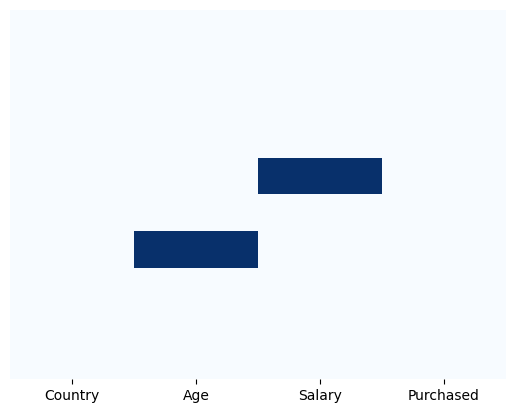

In [99]:
fig, ax = plt.subplots()
sns.heatmap(data_df.isna(), cmap="Blues", cbar=False, yticklabels = False)

In [100]:
x = data_df.iloc[:,:-1].values

In [101]:
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [102]:
y = data_df.iloc[:,-1].values
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [103]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan,strategy = "mean")
#fill missing data by mean
imputer.fit(x[:,1:3])
x[:,1:3] = imputer.transform(x[:,1:3])

In [104]:
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

## Encode Categorical Data

#### Encode Independent variable(x)

In [105]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(),[0])], remainder = "passthrough")
x = ct.fit_transform(x)

In [106]:
x

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

#### Encode Dependent Variable

In [107]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [108]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

## Spliting the dataset (x = data, y = output) into the Training set and Test set

In [111]:
x_train

array([[1.0, 0.0, 0.0, -0.28776576237274665, -0.25604444214896166],
       [0.0, 0.0, 1.0, 0.21350363014752174, 0.07120762592308397],
       [0.0, 1.0, 0.0, -1.1232147499065275, -0.6923805329116892],
       [0.0, 0.0, 1.0, -1.6244841424267957, -1.3468846690557803],
       [0.0, 1.0, 0.0, 0.547683225161034, 0.37421880006386726],
       [1.0, 0.0, 0.0, 1.884401605215083, 2.0347200343553578],
       [0.0, 0.0, 1.0, 0.34346236154166554, -0.9105485782930529],
       [1.0, 0.0, 0.0, 0.0464138326407656, 0.7257117620671751]],
      dtype=object)

In [112]:
x_test

array([[1.0, 0.0, 0.0, -1.0, -1.0],
       [0.0, 1.0, 0.0, 1.0, 1.0]], dtype=object)

In [113]:
y_train

array([1, 0, 0, 1, 1, 1, 0, 1])

In [114]:
y_test

array([0, 0])

## Feature Scaling

In [79]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#x_train[:,3:] = sc.fit_transform(x_train[:,3:])

In [80]:
#x_train

In [81]:
#x_test[:,3:] = sc.fit_transform(x_test[:,3:])

In [82]:
#x_test